In [1]:
import sys
sys.path.append('..')
from nn import *
from viz import plot_history
from tools import train_test_split

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
mnist01 = np.load('datasets/mnist01.npz')
X, y= mnist01['X'], mnist01['y']

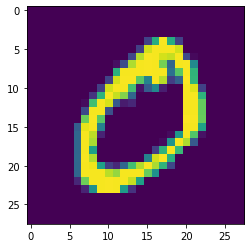

In [4]:
plt.imshow(X[0]);

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train = (X_train.astype(np.float32) / 255.0)
X_test = ( X_test.astype(np.float32) / 255.0)

In [6]:
mod = NeuralNetwork(loss='binary_crossentropy', optimizer='adam', verbose=True, verbose_step=1)
mod.add(Flatten())
mod.add(Dense(769, activation='relu'))
mod.add(Dropout(.5))
mod.add(Dense(789, activation='relu'))
mod.add(Dropout(.5))
mod.add(Dense(1, activation='sigmoid'))
h = mod.fit(X_train, y_train, X_test, y_test, n_epochs=10, batch_size=32, metrics=['accuracy'])
plot_history(h)

../activations.py:62: RuntimeWarning: overflow encountered in exp
  return 1 / ((1 + np.exp(-X)) + self.bias)
../loss.py:23: RuntimeWarning: invalid value encountered in true_divide
  return (Y_pred - Y) / (Y_pred * (1 - Y_pred))
../activations.py:86: RuntimeWarning: invalid value encountered in greater_equal
  return np.where(X >= 0, X, 0.0)
../activations.py:89: RuntimeWarning: invalid value encountered in greater_equal
  return np.where(Z >= 0, 1.0, 0.0)
../metrics.py:4: RuntimeWarning: invalid value encountered in greater
  ev = y_true == (y_pred > threshold)


[    1/10]: loss=nan val_loss=nan accuracy=0.46515 val_accuracy=0.47521 


KeyboardInterrupt: 

In [ ]:
mod.summary()

In [7]:
b = BatchNorm()

In [8]:
X = np.array([[1, 0],
              [1, .2]])

In [9]:

b.forward_propagate(X)

../layers.py:221: RuntimeWarning: invalid value encountered in true_divide
  Z = (X - X.mean(axis=0)) / X.std(axis=0)


array([[nan, -1.],
       [nan,  1.]])